In [58]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import os, sys
import re
import pickle
import vector
import mplhep as hep
import math
from tabulate import tabulate
from collections import defaultdict

vector.register_awkward()

# parameters for matplotlib styling
plt.style.use(hep.style.CMS)

matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams.update({'font.size': 20})

In [61]:
# parameters
unblind = False                               # don't show D_obs for SUEP
input_label = 'nconst25'
output_label = 'SUEP'
file_ext = '.pdf'

# default
plotDir = os.environ['HOME']+"/SUEPCoffea_dask/plotting/"
infile_name_data = plotDir+'JetHT_' + input_label + '.pkl'
infile_name_QCD = plotDir+'QCD_' + input_label + '.pkl'
files = [infile_name_data, infile_name_QCD]

In [73]:
# function to load files from pickle
def openpkl(infile_name):
    with (open(infile_name, "rb")) as openfile:
        plots = pickle.load(openfile)
        plots.update(pickle.load(openfile))
    return plots

def plot1d(h, ax, label, color='midnightblue', lw=1):
    values, x = h.to_numpy()
    ax.step(x[:-1],values, label=label, color=color, lw=lw)
    ax.set_xlabel(h.axes[0].label)
    ax.set_ylabel("Events")
    
def plot2d(h, ax, log=False):
    w, x, y = h.to_numpy()
    if log: mesh = ax.pcolormesh(x, y, w.T, cmap="RdYlBu", norm=matplotlib.colors.LogNorm())
    else: mesh = ax.pcolormesh(x, y, w.T, cmap="RdYlBu")
    ax.set_xlabel(h.axes[0].label)
    ax.set_ylabel(h.axes[1].label)
    fig.colorbar(mesh)
    
def find_nth(string, substring, n):
    if (n == 1):
        return string.find(substring)
    else:
        return string.find(substring, find_nth(string, substring, n - 1) + 1)
    
def combine_bins(x, y, e, n=4):
    old_e = e
    old_y = y
    old_x = x
    
    y = []
    x = []
    e = []
   
    for j in list(range(0,len(old_y), n)):
        y.append(np.sum(old_y[j:j+n])/n)
        x.append(np.sum(old_x[j:j+n])/n)
        e.append(np.sum(old_e[j:j+n])/n)
        
    return x, y, e

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

In [74]:
# load file(s)
for infile_name in files:
    if not os.path.isfile(infile_name): 
        print("WARNING:",infile_name,"doesn't exist")
    else:
        print("Loading",infile_name)
        if 'QCD' in infile_name:
            plots['QCD_MC'] = openpkl(infile_name)
        if 'Jet' in infile_name:
            plots['data'] = openpkl(infile_name)

Loading /home/lavezzo/SUEPCoffea_dask/plotting/JetHT_nconst25.pkl
Loading /home/lavezzo/SUEPCoffea_dask/plotting/QCD_nconst25.pkl


In [75]:
data = nested_dict(4,float)

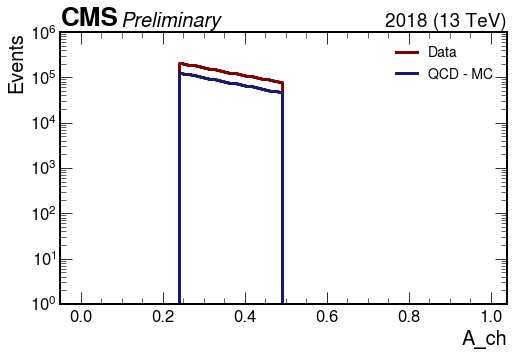

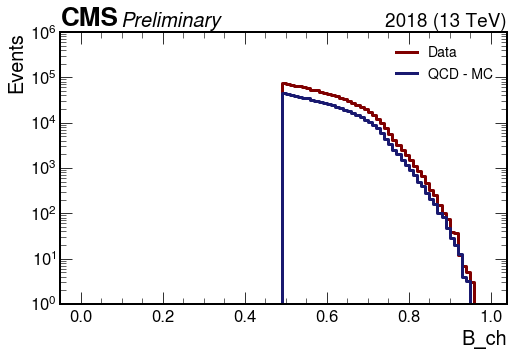

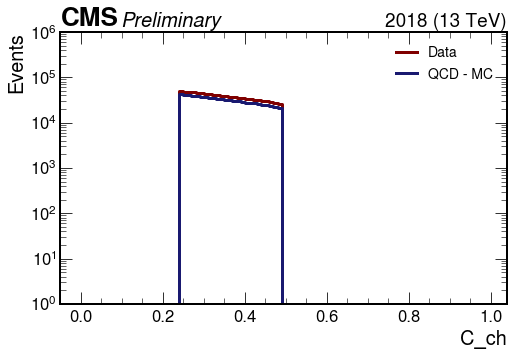

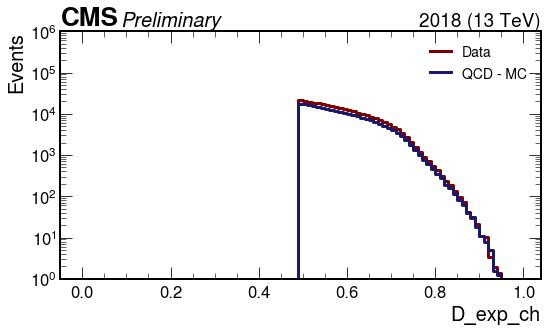

In [76]:
### Make ABCD plots and table based on selection (e.g. 'ch', 'mult')
selection = 'ch'
save = True

for plot_label in ['A_'+selection,'B_'+selection,'C_'+selection,'D_exp_'+selection,'D_obs_'+selection]:
        
    if 'D_obs' in plot_label and (not unblind): continue
    
    # define figure, axis on which to plot QCD and SUEP
    fig, ax = plt.subplots(figsize=(8,5))
    hep.cms.label("Preliminary", data=True, year=2018)

    # QCD hist for ABCD region
    hdata = plots['data'][plot_label]
    hQCD_MC = plots['QCD_MC'][plot_label]
    
    # plot QCD, sum values and errs
    plot1d(hdata, ax, 'Data', color='maroon', lw=3)
    plot1d(hQCD_MC, ax, 'QCD - MC', color='midnightblue', lw=3)
    
    data['data'][plot_label]["value"] = np.sum(hdata.values())
    data['data'][plot_label]["err"] = np.sum(np.sqrt(hdata.variances()))
    data['QCD_MC'][plot_label]["value"] = np.sum(hQCD_MC.values())
    data['QCD_MC'][plot_label]["err"] = np.sum(np.sqrt(hQCD_MC.variances()))
    
    ax.set_ylim(1e0,1e6)
    ax.set_yscale('log')
    ax.legend(loc='best', fontsize=14, framealpha=1, facecolor='white', shadow=True)
    
    if save: fig.savefig(output_label + "_" + plot_label + file_ext, bbox_inches='tight')

fig.tight_layout()
fig.show()

A_ch


/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: invalid value encountered in true_divide
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),yerr=yerrors, color="black", fmt='o')


B_ch


/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: divide by zero encountered in true_divide
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: invalid value encountered in true_divide
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: invalid value encountered in subtract
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:69: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),yerr=yerrors, color="black", fmt='o')
/tmp/ipykernel_3245855/3559583313.py:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),y

C_ch


/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: invalid value encountered in true_divide
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),yerr=yerrors, color="black", fmt='o')


D_exp_ch


/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: divide by zero encountered in true_divide
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: invalid value encountered in true_divide
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:66: RuntimeWarning: invalid value encountered in subtract
  yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]
/tmp/ipykernel_3245855/3559583313.py:69: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),yerr=yerrors, color="black", fmt='o')
/tmp/ipykernel_3245855/3559583313.py:69: RuntimeWarning: invalid value encountered in true_divide
  ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),y

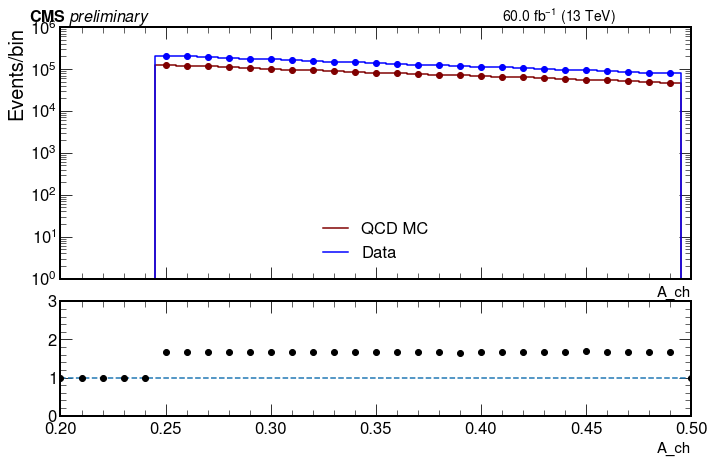

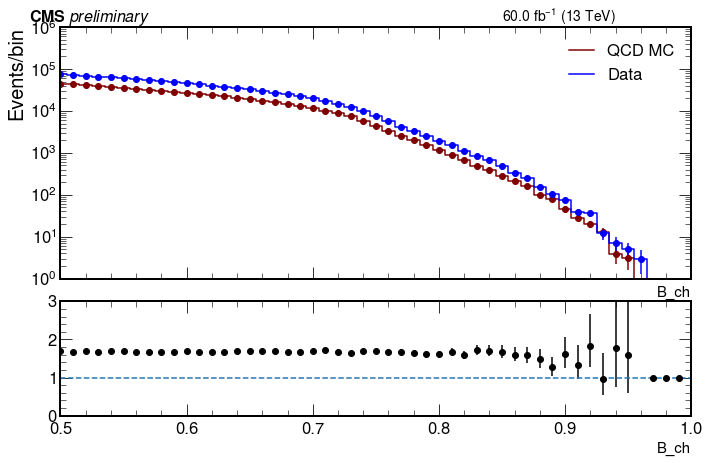

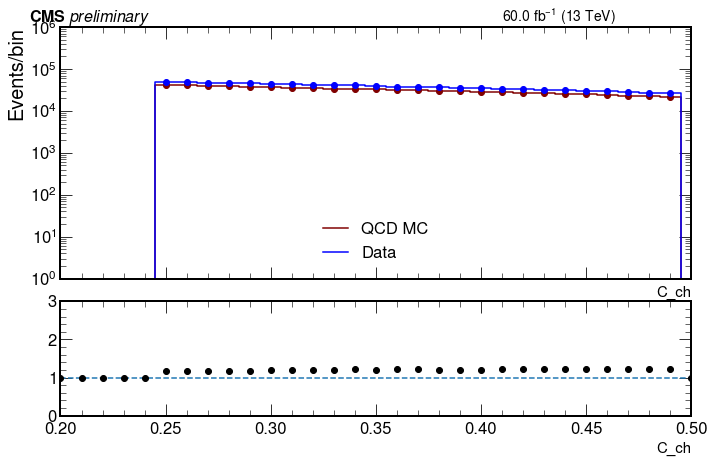

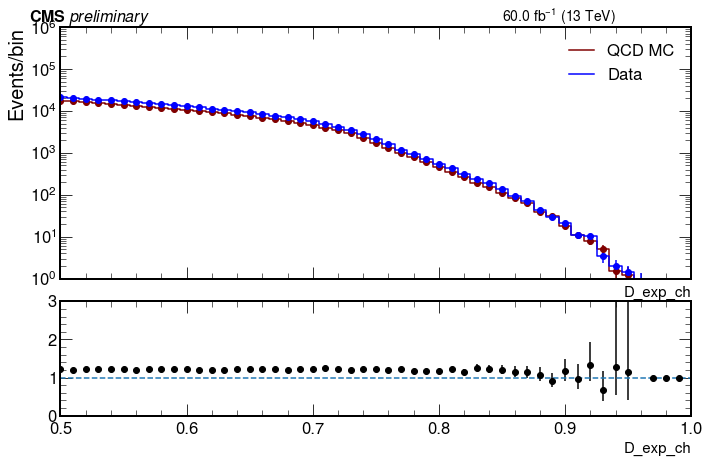

In [95]:
### Make ABCD plots and table based on selection (e.g. 'ch', 'mult')
selection = 'ch'
save = True

for plot_label in ['A_'+selection,'B_'+selection,'C_'+selection,'D_exp_'+selection,'D_obs_'+selection]:
    
    if 'D_obs' in plot_label and (not unblind): continue
    
    print(plot_label)
        
    hQCD_MC_errs = np.sqrt(plots['QCD_MC'][plot_label].variances())
    hdata_errs = np.sqrt(plots['data'][plot_label].variances())

    #Set up variables for the stacked histogram
    plt.figure(figsize=(12,10))
    plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
    ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

    QCD_MC, x = plots['QCD_MC'][plot_label].to_numpy()
    ax1.step(x[:-1],QCD_MC, color='maroon',label="QCD MC", where='mid')
    ax1.errorbar(x[:-1],QCD_MC, yerr=hQCD_MC_errs, color="maroon".upper(), fmt='o')

    data, x = plots['data'][plot_label].to_numpy()
    ax1.step(x[:-1],data, color='blue',label="Data", where= 'mid')
    ax1.errorbar(x[:-1],data, yerr=hdata_errs, color="blue".upper(), fmt='o')

    ax1.set_yscale("log")
    ymax = 1e6
    ax1.set_ylim([1e0, ymax])
    if 'A_' in plot_label or 'C_' in plot_label:
        xmin = 0.2
        xmax = 0.5
        ax1.set_xlim([xmin,xmax])
    elif 'B_' in plot_label or 'D_' in plot_label:
        xmin = 0.5
        xmax = 1.0
        ax1.set_xlim([xmin,xmax])
        
    #Set parameters that will be used to make the plots prettier
    #max_y = ax1.gca().get_ylim()[1]
    max_y = ymax + ymax*0.2
    max_x = xmax
    min_x = xmin
    x_range = max_x - min_x
    lower_label = min_x - x_range*0.05
    upper_label = max_x - x_range*0.35
    

    #X and Y labels (Do not use the central matplotlob default)
    ax1.set_xlabel(plot_label, x=1, ha='right', fontsize=15)
    ax1.set_ylabel("Events/bin", y=1, ha='right')

    cms = ax1.text(
            lower_label, max_y*1.08, u"CMS $\it{preliminary}$",
            fontsize=16, fontweight='bold',
    )

    lumi = ax1.text(
            upper_label, max_y*1.08, r"%.1f fb$^{-1}$ (13 TeV)" % 60,
            fontsize=14, 
    )
    ax1.legend()

    ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    yerrors = [data/QCD_MC - (data-hdata_errs)/(QCD_MC+hQCD_MC_errs),(data+hdata_errs)/(QCD_MC-hQCD_MC_errs) - data/QCD_MC]

    #yerrors = [(QCD_obs-QCD_obs_errors)/(QCD_exp+QCD_exp_errors),(QCD_obs+QCD_obs_errors)/(QCD_exp-QCD_exp_errors)]
    ax2.errorbar(x[:-1],np.where(data>0,data/QCD_MC,1),yerr=yerrors, color="black", fmt='o')
    ax2.axhline(1, ls="--")
    ax2.set_ylim(0,3)
    ax2.set_xlabel(plot_label, fontsize=15)
    if save: plt.savefig(plot_label+"_closure_"+selection+file_ext)

In [97]:
table = []
for i in range(len(list(SUEPdata.keys()))):
    label = list(SUEPdata.keys())[i]
    line = []
    line.append(label)
    
    for r in ['A_'+selection,'B_'+selection,'C_'+selection,'D_exp_'+selection,'D_obs_'+selection]:
        if 'QCD' in label:
            line.append("{:0.0f} ".format(SUEPdata[label][r]['value']) + r'$\pm$' + " {:0.0f}".format(SUEPdata[label][r]['err']))
        else:
            line.append("{:0.2f} ".format(SUEPdata[label][r]['value']) + r'$\pm$' + " {:0.2f}".format(SUEPdata[label][r]['err']))
        
    if 'QCD' in label:
        line.append(round((SUEPdata[label]['D_exp_'+selection]['value']-SUEPdata[label]['D_obs_'+selection]['value'])/SUEPdata[label]['D_exp_'+selection]['value'],2))
        line.append(0)
    else:
        line.append(0)
        line.append(SUEPdata[label]['D_obs_'+selection]['value']/math.sqrt(SUEPdata[label]['D_obs_'+selection]['value']+SUEPdata[label]['D_exp_'+selection]['value']+SUEPdata[label]['D_obs_'+selection]['err']+SUEPdata['QCD']['D_exp_'+selection]['err']))
    table.append(line)                                                         

In [98]:
t = tabulate(table,tablefmt ='latex',
               headers=['Process', 'A', 'B', 'C', 'D_{exp}', 'D_{obs}', 'D_{exp}-D_{obs}/D_{exp}', 'S/$\sqrt(S+B+\sigma_{S}+\sigma_{B}$)'])
with open('table.txt', 'w') as f:
    f.write(t)
t

'\\begin{tabular}{llllllrr}\n\\hline\n Process            & A                  & B                 & C                 & D\\_\\{exp\\}           & D\\_\\{obs\\}           &   D\\_\\{exp\\}-D\\_\\{obs\\}/D\\_\\{exp\\} &   S/\\$\\textbackslash{}sqrt(S+B+\\textbackslash{}sigma\\_\\{S\\}+\\textbackslash{}sigma\\_\\{B\\}\\$) \\\\\n\\hline\n SUEP-m1000-darkPho & 0.00 \\$\\textbackslash{}pm\\$ 0.00    & 0.00 \\$\\textbackslash{}pm\\$ 0.00   & 2.18 \\$\\textbackslash{}pm\\$ 1.48   & 0.00 \\$\\textbackslash{}pm\\$ 0.00   & 46.26 \\$\\textbackslash{}pm\\$ 6.80  &                      0    &                              1.19059   \\\\\n SUEP-m750-darkPho  & 0.00 \\$\\textbackslash{}pm\\$ 0.00    & 0.00 \\$\\textbackslash{}pm\\$ 0.00   & 1.57 \\$\\textbackslash{}pm\\$ 1.25   & 0.00 \\$\\textbackslash{}pm\\$ 0.00   & 19.48 \\$\\textbackslash{}pm\\$ 4.41  &                      0    &                              0.506162  \\\\\n SUEP-m400-darkPho  & 0.00 \\$\\textbackslash{}pm\\$ 0.00    & 0.00 \\$

In [99]:
def convert2LatexString(s):
    r = r'(\^\{\})'; s = re.sub(r, "^", s)
    s = re.sub(r'\\([\$\_\{\}\^])', r'\1', s)
    s = re.sub(r'(\\textbackslash{})', r'\\', s)
    return s

t = convert2LatexString(t)
with open('table.txt', 'w') as f:
    f.write(t)
t

'\\begin{tabular}{llllllrr}\n\\hline\n Process            & A                  & B                 & C                 & D_{exp}           & D_{obs}           &   D_{exp}-D_{obs}/D_{exp} &   S/$\\sqrt(S+B+\\sigma_{S}+\\sigma_{B}$) \\\\\n\\hline\n SUEP-m1000-darkPho & 0.00 $\\pm$ 0.00    & 0.00 $\\pm$ 0.00   & 2.18 $\\pm$ 1.48   & 0.00 $\\pm$ 0.00   & 46.26 $\\pm$ 6.80  &                      0    &                              1.19059   \\\\\n SUEP-m750-darkPho  & 0.00 $\\pm$ 0.00    & 0.00 $\\pm$ 0.00   & 1.57 $\\pm$ 1.25   & 0.00 $\\pm$ 0.00   & 19.48 $\\pm$ 4.41  &                      0    &                              0.506162  \\\\\n SUEP-m400-darkPho  & 0.00 $\\pm$ 0.00    & 0.00 $\\pm$ 0.00   & 0.45 $\\pm$ 0.67   & 0.00 $\\pm$ 0.00   & 4.87 $\\pm$ 2.21   &                      0    &                              0.127279  \\\\\n SUEP-m125-darkPho  & 0.07 $\\pm$ 0.26    & 0.10 $\\pm$ 0.32   & 0.29 $\\pm$ 0.54   & 0.41 $\\pm$ 0.64   & 0.78 $\\pm$ 0.88   &                      0 